In [44]:
import pandas as pd
import numpy as np

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

import matplotlib as mpl
import matplotlib.pyplot as plt

import os

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['image.cmap'] = 'viridis'

%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

In [33]:
ROOT_DIR = '../../tmp/logs/'

In [75]:
def __get_logs(path):
    # Loading too much data is slow...
    tf_size_guidance = {
        'compressedHistograms': 10,
        'images': 0,
        'scalars': 100,
        'histograms': 1
    }

    event_acc = EventAccumulator(path, tf_size_guidance)
    event_acc.Reload()
    tags = event_acc.Tags()
    out = {}
    
    for scalar in tags['scalars']:
        out[scalar] = []
        data = event_acc.Scalars(scalar)
        size = len(data)
        
        for event in data:
            out[scalar].append(event[2]) # append value
    
    return out

In [76]:
def get_logs(key):
    log_dir = os.path.join(ROOT_DIR, key)

    train_logs = __get_logs(os.path.join(log_dir, 'train'))
    test_logs = __get_logs(os.path.join(log_dir, 'validation'))

    scalar_name = 'epoch_categorical_accuracy'
    df_dict = {
        'step': [],
        'dataset': [],
    }

    for dataset_key, dataset in {'train': train_logs, 'test': test_logs}.items():
        tmp = {}

        for scalar_name in dataset:
            for step, scalar in enumerate(dataset[scalar_name]):
                if step not in tmp:
                    tmp[step] = {}               
                tmp[step][scalar_name] = scalar


        for step, scalars in tmp.items():                    
            df_dict['step'].append(step)
            df_dict['dataset'].append(dataset_key)

            for scalar_name, scalar in scalars.items():
                if scalar_name not in df_dict:
                    df_dict[scalar_name] = []            
                df_dict[scalar_name].append(scalar)
                
    return pd.DataFrame.from_dict(df_dict)  

Text(0.5, 1.0, 'Priebeh trénovania 3D CNN + Aug. + Batch Norm + Dropout + l2')

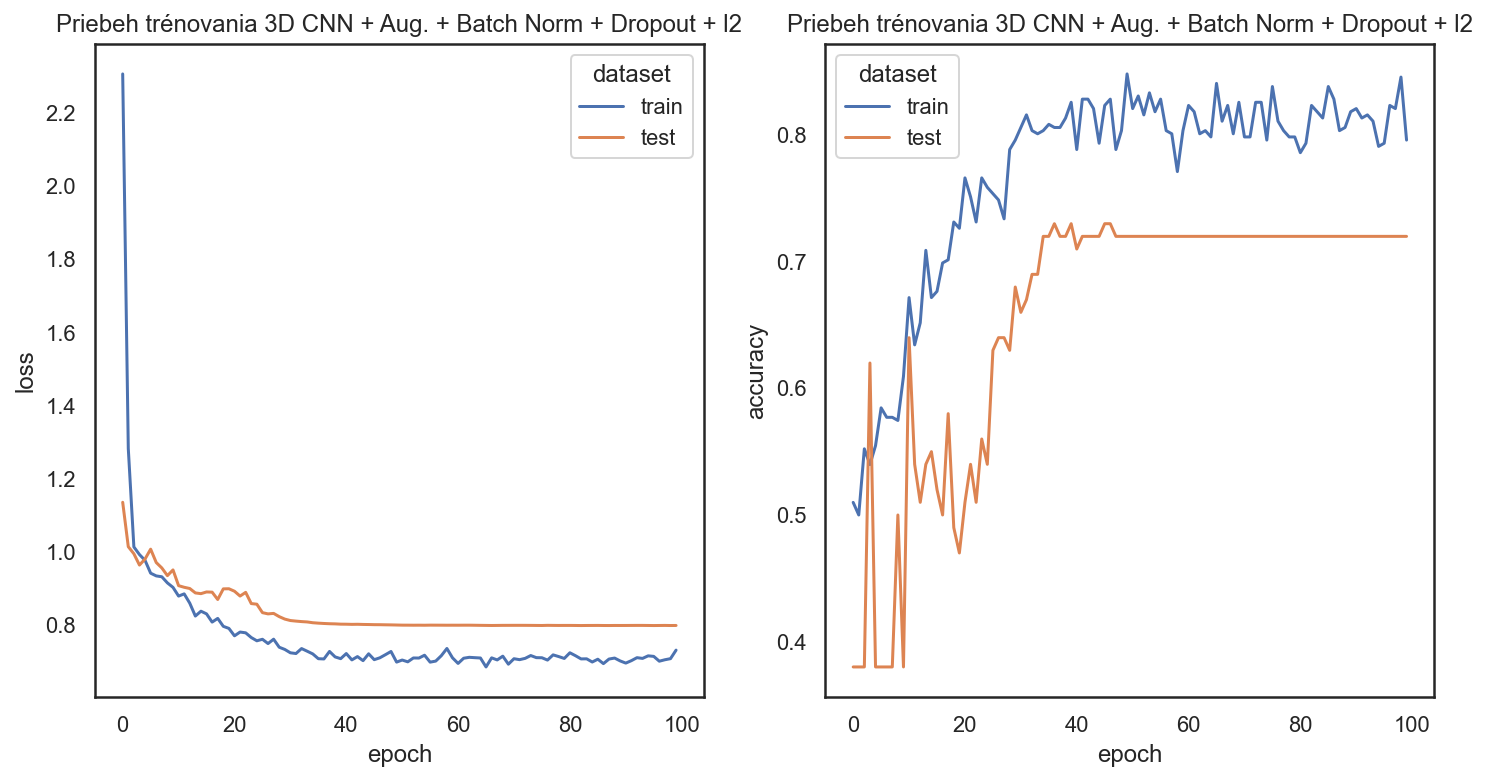

In [89]:
key = '20201229-204522'
df = get_logs(key)
 
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df.rename(columns={'step': 'epoch', 'epoch_loss': 'loss'}), x='epoch', y='loss', hue='dataset').set_title('Priebeh trénovania 3D CNN + Aug. + Batch Norm + Dropout + l2')

plt.subplot(1, 2, 2)
sns.lineplot(data=df.rename(columns={'step': 'epoch', 'epoch_categorical_accuracy': 'accuracy'}), x='epoch', y='accuracy', hue='dataset').set_title('Priebeh trénovania 3D CNN + Aug. + Batch Norm + Dropout + l2')

Text(0.5, 1.0, 'Priebeh trénovania 3D CNN + Augmentácie + Batch Norm')

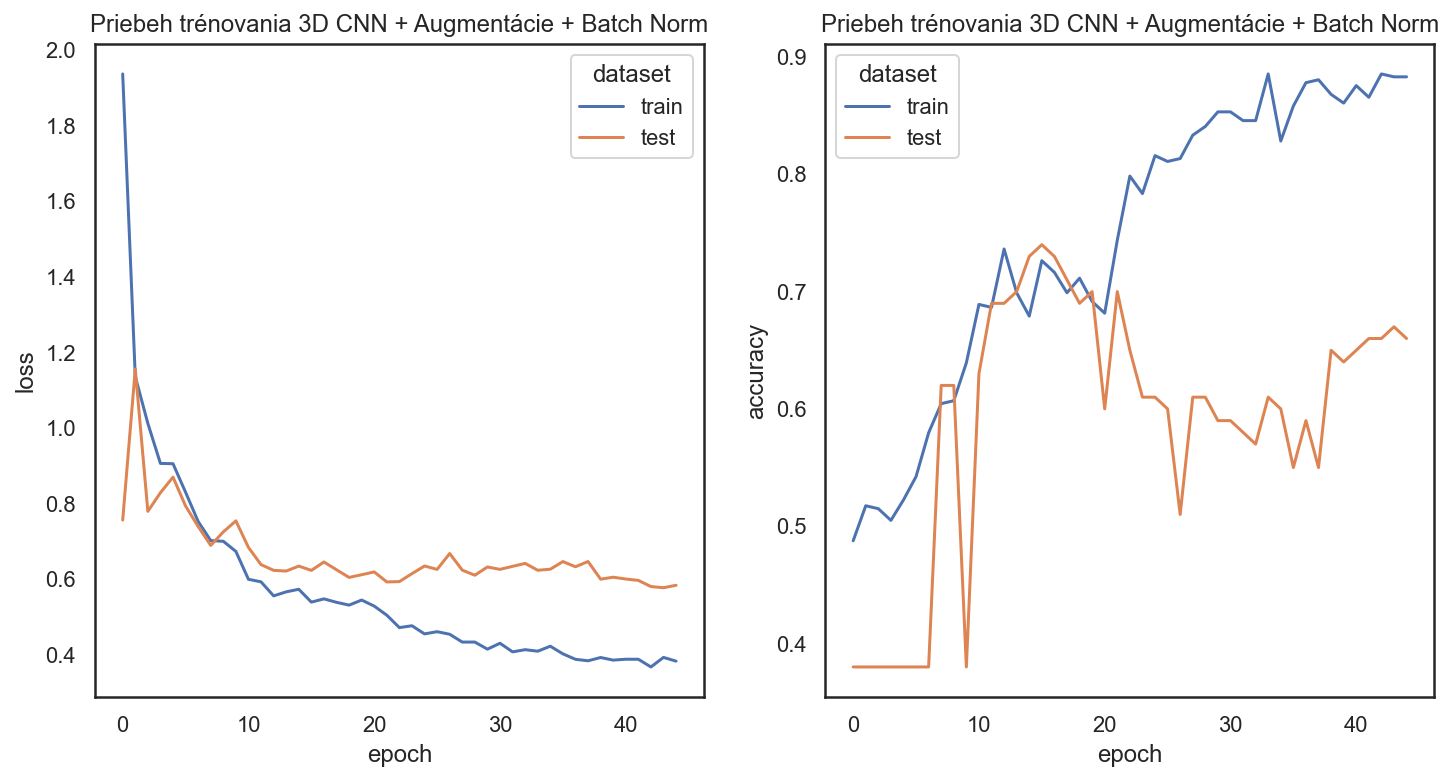

In [90]:
key = '20201229-141718'
df = get_logs(key)
 
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df.rename(columns={'step': 'epoch', 'epoch_loss': 'loss'}), x='epoch', y='loss', hue='dataset').set_title('Priebeh trénovania 3D CNN + Augmentácie + Batch Norm')

plt.subplot(1, 2, 2)
sns.lineplot(data=df.rename(columns={'step': 'epoch', 'epoch_categorical_accuracy': 'accuracy'}), x='epoch', y='accuracy', hue='dataset').set_title('Priebeh trénovania 3D CNN + Augmentácie + Batch Norm')

Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.


Text(0.5, 1.0, 'Priebeh trénovania 3D CNN (presnosť)')

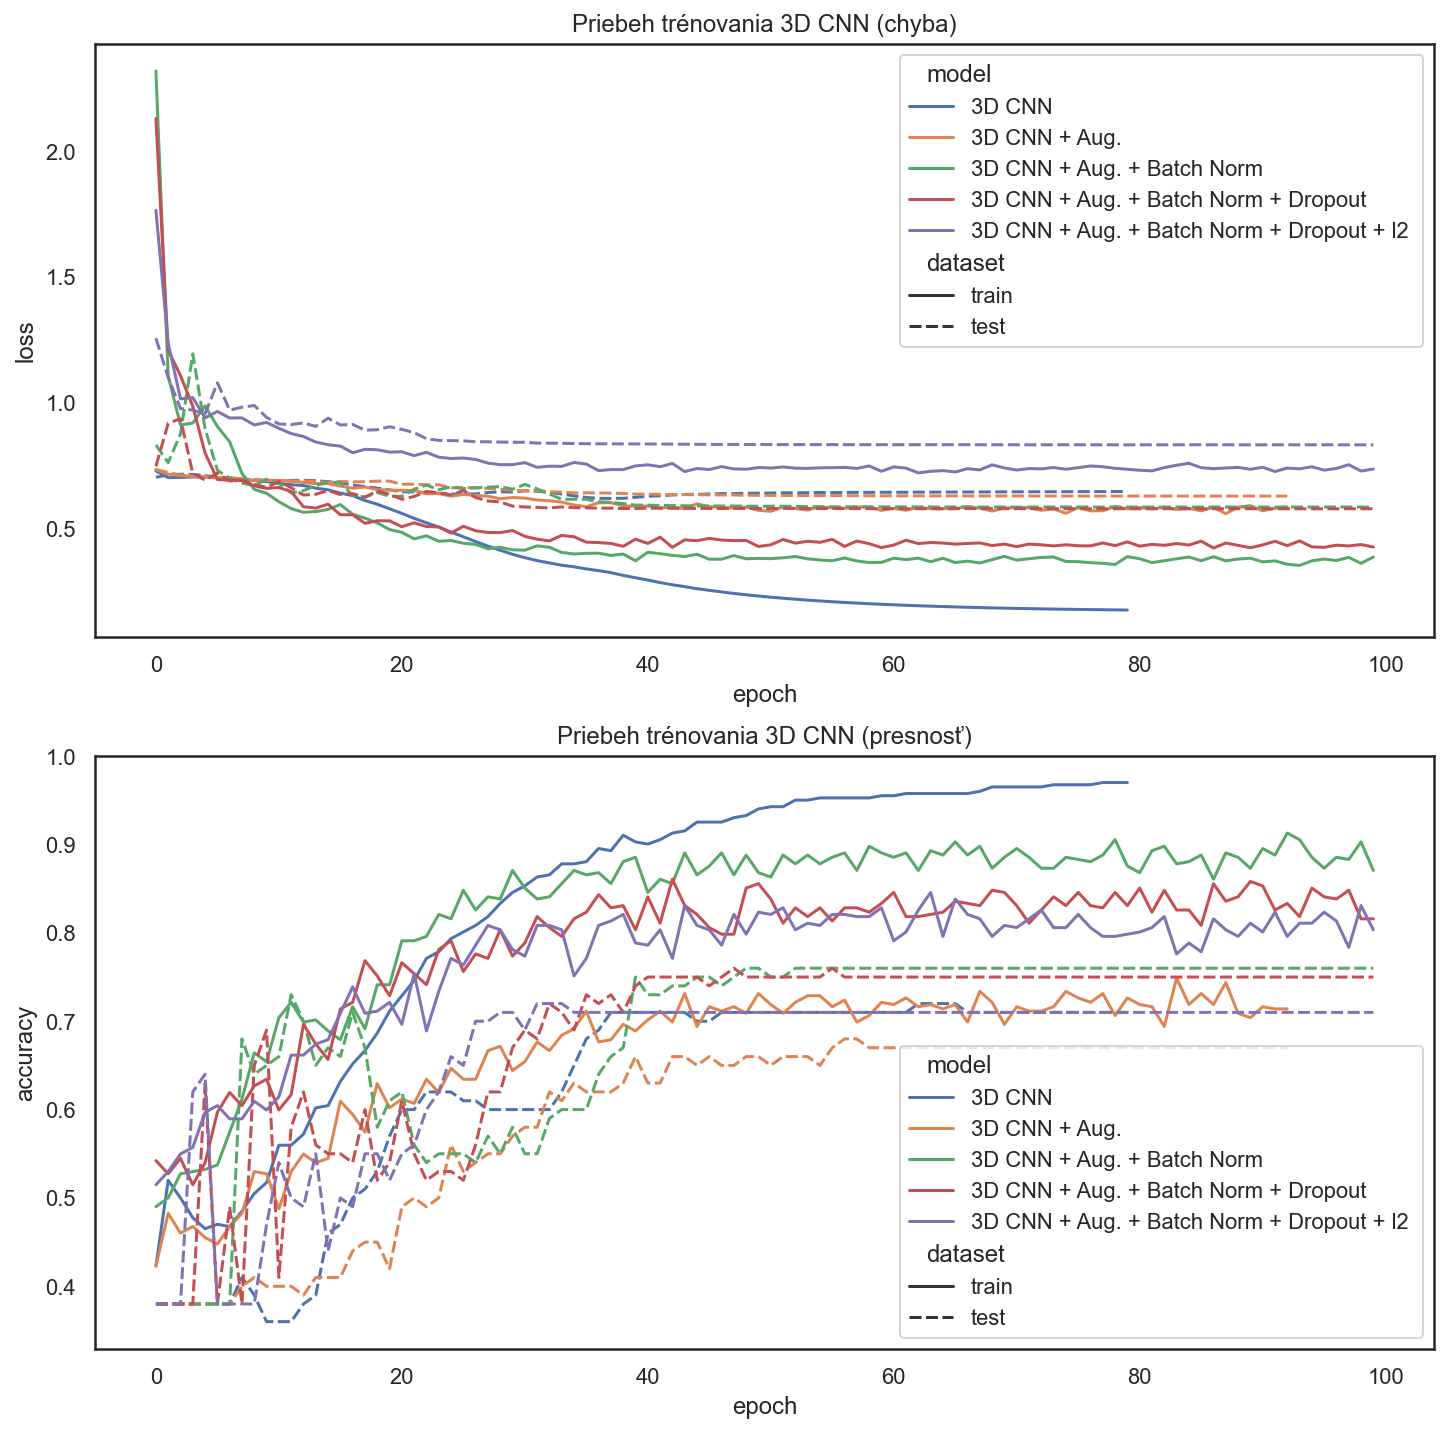

In [120]:
df_a = get_logs('20201230-113943')
df_b = get_logs('20201230-124857')
df_c = get_logs('20201230-141224')

df_x = get_logs('20201229-120057')
df_y = get_logs('20201229-132850')

20201230-141224

df_a['model'] = df_a.apply(lambda _: '3D CNN + Aug. + Batch Norm', axis=1)
df_b['model'] = df_b.apply(lambda _: '3D CNN + Aug. + Batch Norm + Dropout', axis=1)
df_c['model'] = df_c.apply(lambda _: '3D CNN + Aug. + Batch Norm + Dropout + l2 ', axis=1)

df_x['model'] = df_a.apply(lambda _: '3D CNN', axis=1)
df_y['model'] = df_a.apply(lambda _: '3D CNN + Aug.', axis=1)

df = pd.concat([df_x, df_y, df_a, df_b, df_c])

plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
sns.lineplot(data=df.rename(columns={'step': 'epoch', 'epoch_loss': 'loss'}), x='epoch', y='loss', hue='model', style='dataset').set_title('Priebeh trénovania 3D CNN (chyba)')

plt.subplot(2, 1, 2)
sns.lineplot(data=df.rename(columns={'step': 'epoch', 'epoch_categorical_accuracy': 'accuracy'}), x='epoch', y='accuracy', hue='model', style='dataset').set_title('Priebeh trénovania 3D CNN (presnosť)')

Text(0.5, 1.0, 'Priebeh trénovania 2D a 3D ResNET (presnosť)')

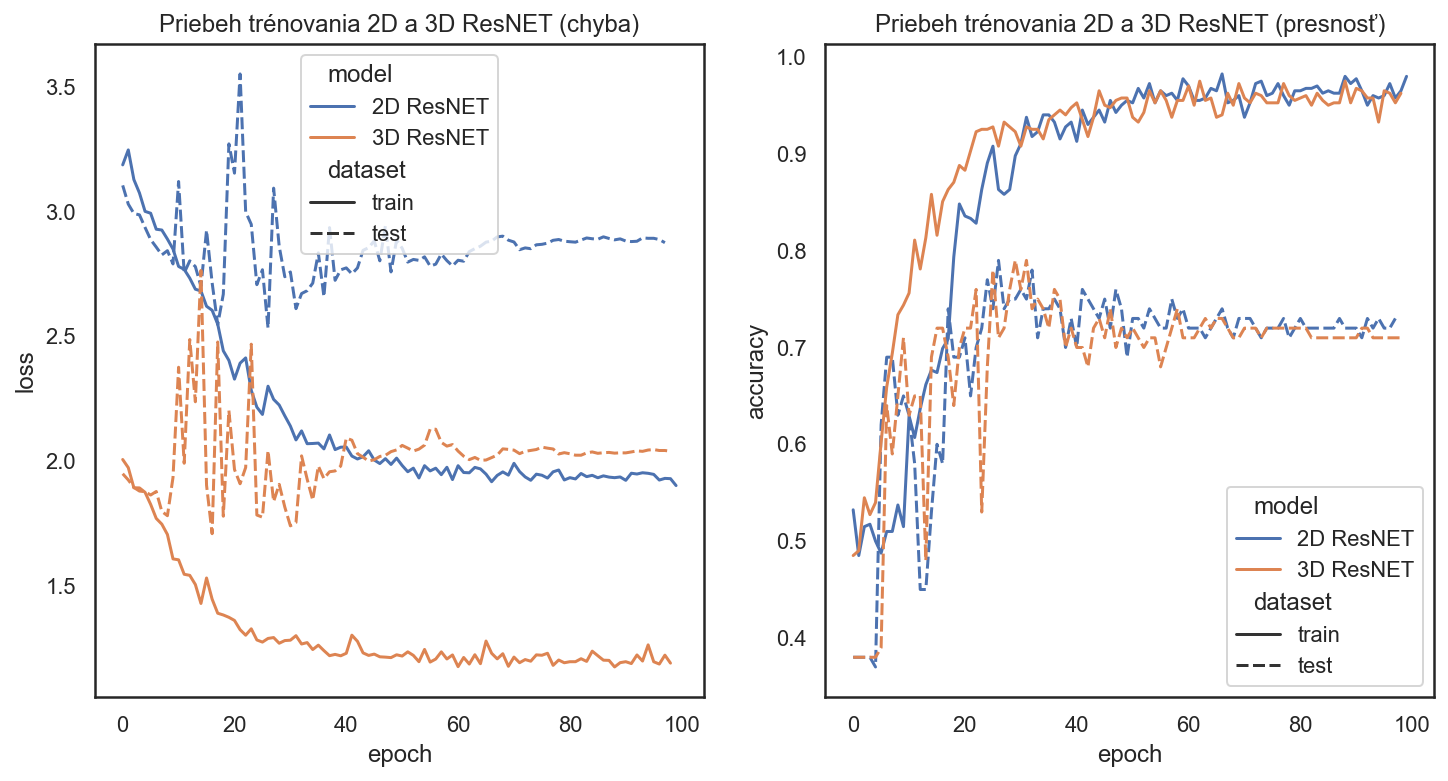

In [115]:
df_3d = get_logs('20201230-131726')
df_2d = get_logs('20201230-142654')

df_3d['model'] = df_3d.apply(lambda _: '3D ResNET', axis=1)
df_2d['model'] = df_3d.apply(lambda _: '2D ResNET', axis=1)

df = pd.concat([df_2d, df_3d])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df.rename(columns={'step': 'epoch', 'epoch_loss': 'loss'}), x='epoch', y='loss', hue='model', style='dataset').set_title('Priebeh trénovania 2D a 3D ResNET (chyba)')

plt.subplot(1, 2, 2)
sns.lineplot(data=df.rename(columns={'step': 'epoch', 'epoch_categorical_accuracy': 'accuracy'}), x='epoch', y='accuracy', hue='model', style='dataset').set_title('Priebeh trénovania 2D a 3D ResNET (presnosť)')

In [40]:
get_logs('../../tmp/logs/20201229-204522/train')

,epoch_loss,epoch_recall,epoch_precision,epoch_auc,epoch_categorical_accuracy
0,2.306092,0.509950,0.509950,0.519325,0.509950
1,1.283023,0.500000,0.500000,0.486495,0.500000
2,1.014134,0.552239,0.552239,0.568349,0.552239
3,0.993275,0.539801,0.539801,0.535599,0.539801
4,0.977410,0.554726,0.554726,0.561889,0.554726
...,...,...,...,...,...
95,0.715152,0.793532,0.793532,0.899591,0.793532
96,0.702010,0.823383,0.823383,0.907781,0.823383
97,0.705936,0.820895,0.820895,0.905191,0.820895
98,0.708915,0.845771,0.845771,0.915386,0.845771
